# -1. Analiza Danych biletów, Dominik Strzałko

# 0. Import bibliotek, wczytanie danych, wstępna analiza i oczyszczenie

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette('pastel')[0:5]

font = {'family' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
plt.rcParams.update({'font.size': 22})

%matplotlib inline
sns.set()

In [51]:
df = pd.read_csv("data.csv")

In [52]:
df

,Forma sprzedaży,Bilety,Data transakcji,Ilosc biletow,Netto,Stawka VAT,VAT,Brutto,Płeć,Miasto
0,Online,Bilet wstępu,9/3/21 16:07,1,63.00 zł,8.00%,5.20,70.20 zł,K,Warszawa
1,Online,Bilet wstępu,9/3/21 16:32,1,63.00 zł,8.00%,5.20,70.20 zł,K,Warszawa
2,Online,Bilet wstępu,9/3/21 16:54,1,63.00 zł,8.00%,5.20,70.20 zł,M,Warszawa
3,Online,Bilet wstępu,9/3/21 16:55,1,63.00 zł,8.00%,5.20,70.20 zł,K,Wrocław
4,Online,Bilet wstępu,9/3/21 18:23,1,63.00 zł,8.00%,5.20,70.20 zł,M,Poznań
...,...,...,...,...,...,...,...,...,...,...
2689,Online,Bilet wstępu,11/19/21 23:02,1,76.00 zł,8.00%,6.08,82.08 zł,K,Miasto powyzej 50 tys.
2690,Online,Bilet wstępu,11/20/21 1:23,1,76.00 zł,8.00%,6.08,82.08 zł,M,Kraków
2691,Online,Bilet wstępu,11/20/21 5:47,1,76.00 zł,8.00%,6.08,82.08 zł,K,Miasto powyzej 50 tys.
2692,Online,Bilet wstępu,11/20/21 9:15,1,76.00 zł,8.00%,6.08,82.08 zł,M,Poznań


In [53]:
for col in df:
  print(df[col].unique())

['Online' 'Stacjonarne']
['Bilet wstępu']
['9/3/21 16:07' '9/3/21 16:32' '9/3/21 16:54' ... '11/19/21 23:02'
 '11/20/21 5:47' '11/20/21 12:29']
[1]
['63.00 zł' '150.00 zł' '80.00 zł' '200.00 zł' '72.00 zł' '95.00 zł'
 '25.00 zł' '35.00 zł' '300.00 zł' '100.00 zł' '40.00 zł' '30.00 zł'
 '82.00 zł' '20.00 zł' '50.00 zł' '15.00 zł' '10.00 zł' '61.80 zł'
 '71.25 zł' '195.00 zł' '85.50 zł' '66.50 zł' '285.00 zł' '23.80 zł'
 '33.25 zł' '38.00 zł' '76.00 zł']
['8.00%']
[ 5.2  12.    6.   16.    5.6   7.2   2.    2.8  24.    8.    3.2   2.4
  6.4   1.6   4.    1.2   0.8   4.94  5.7  15.2   6.84  5.32 22.8   1.9
  2.66  7.6   3.04  6.08]
['70.20 zł' '162.00 zł' '81.00 zł' '216.00 zł' '75.60 zł' '97.20 zł'
 '27.00 zł' '37.80 zł' '324.00 zł' '108.00 zł' '43.20 zł' '32.40 zł'
 '86.40 zł' '21.60 zł' '54.00 zł' '16.20 zł' '10.80 zł' '66.69 zł'
 '76.95 zł' '205.20 zł' '92.34 zł' '71.82 zł' '307.80 zł' '25.65 zł'
 '35.91 zł' '102.60 zł' '41.04 zł' '82.08 zł']
['K' 'M' 'J']
['Warszawa' 'Wrocław' 'Pozna

In [54]:
df = df.drop(['Bilety', 'Ilosc biletow', 'Stawka VAT', 'VAT', 'Brutto' ], axis=1)

In [55]:
df

,Forma sprzedaży,Data transakcji,Netto,Płeć,Miasto
0,Online,9/3/21 16:07,63.00 zł,K,Warszawa
1,Online,9/3/21 16:32,63.00 zł,K,Warszawa
2,Online,9/3/21 16:54,63.00 zł,M,Warszawa
3,Online,9/3/21 16:55,63.00 zł,K,Wrocław
4,Online,9/3/21 18:23,63.00 zł,M,Poznań
...,...,...,...,...,...
2689,Online,11/19/21 23:02,76.00 zł,K,Miasto powyzej 50 tys.
2690,Online,11/20/21 1:23,76.00 zł,M,Kraków
2691,Online,11/20/21 5:47,76.00 zł,K,Miasto powyzej 50 tys.
2692,Online,11/20/21 9:15,76.00 zł,M,Poznań


In [56]:
df.dtypes

Forma sprzedaży    object
Data transakcji    object
Netto              object
Płeć               object
Miasto             object
dtype: object

In [57]:
df["Data transakcji"] = pd.to_datetime(df["Data transakcji"])
df['Data transakcji'] = df['Data transakcji'].dt.normalize()

In [58]:
df["Netto"] = df["Netto"].replace("[ zł,]", "", regex=True).astype(float)

In [59]:
df

,Forma sprzedaży,Data transakcji,Netto,Płeć,Miasto
0,Online,2021-09-03,63.0,K,Warszawa
1,Online,2021-09-03,63.0,K,Warszawa
2,Online,2021-09-03,63.0,M,Warszawa
3,Online,2021-09-03,63.0,K,Wrocław
4,Online,2021-09-03,63.0,M,Poznań
...,...,...,...,...,...
2689,Online,2021-11-19,76.0,K,Miasto powyzej 50 tys.
2690,Online,2021-11-20,76.0,M,Kraków
2691,Online,2021-11-20,76.0,K,Miasto powyzej 50 tys.
2692,Online,2021-11-20,76.0,M,Poznań


# 1. Badanie Formy sprzedaży

## 1.1. Zależnie od płci i ogólna

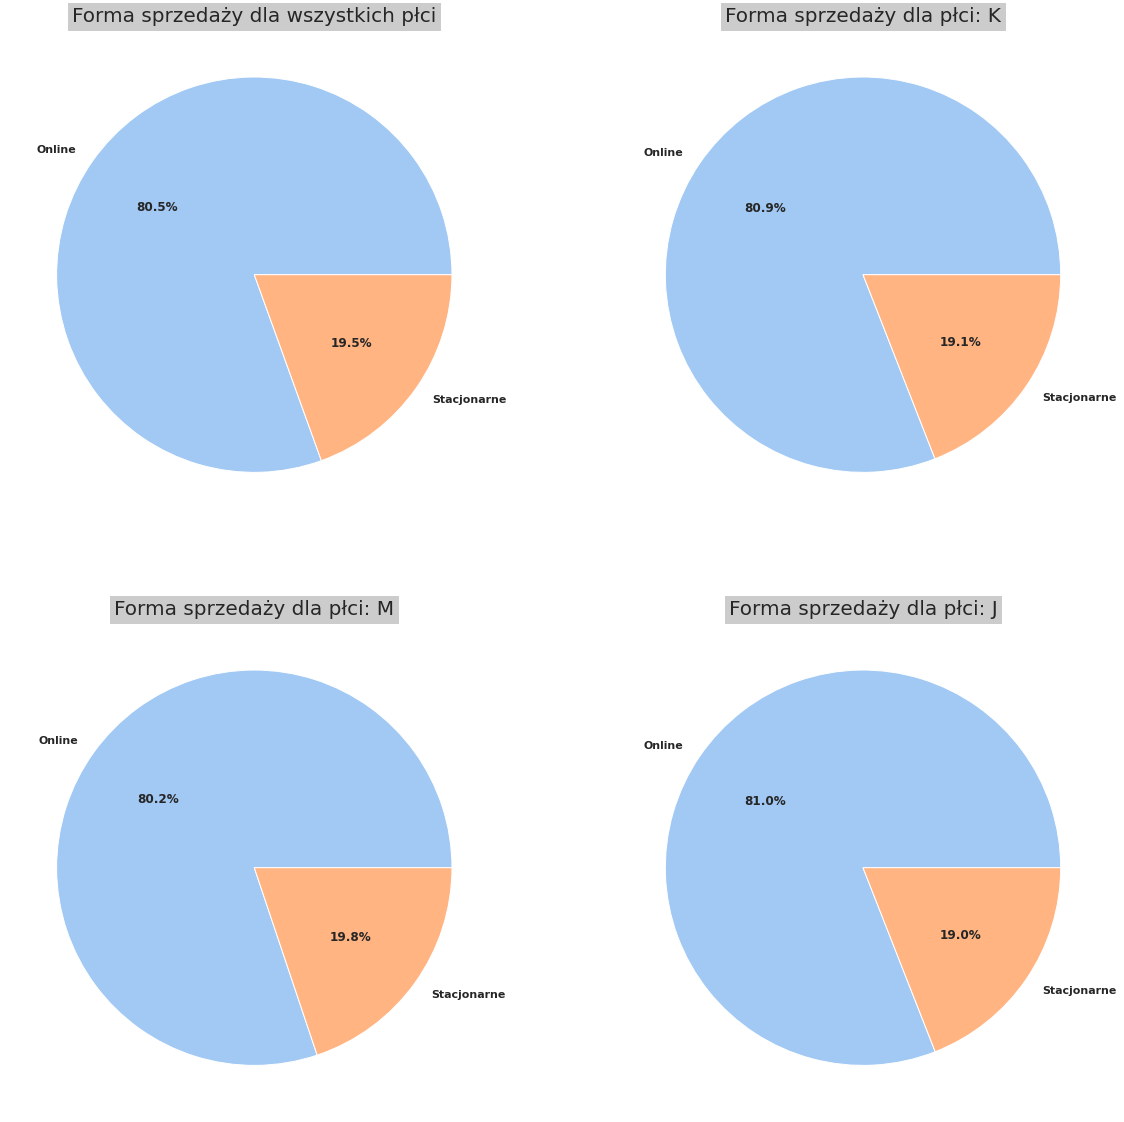

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

axs[0, 0].pie(df['Forma sprzedaży'].value_counts(), labels = df['Forma sprzedaży'].unique(), colors = colors, autopct='%.1f%%')
axs[0,0].set_title("Forma sprzedaży dla wszystkich płci",bbox={'facecolor':'0.8', 'pad':5}, fontsize=20)
axs[0, 1].pie(df.loc[df["Płeć"] == "K", "Forma sprzedaży"].value_counts(), labels = df['Forma sprzedaży'].unique(), colors = colors, autopct='%.1f%%')
axs[0,1].set_title("Forma sprzedaży dla płci: K",bbox={'facecolor':'0.8', 'pad':5}, fontsize=20)
axs[1, 0].pie(df.loc[df["Płeć"] == "M", "Forma sprzedaży"].value_counts(), labels = df['Forma sprzedaży'].unique(), colors = colors, autopct='%.1f%%')
axs[1,0].set_title("Forma sprzedaży dla płci: M",bbox={'facecolor':'0.8', 'pad':5}, fontsize=20)
axs[1, 1].pie(df.loc[df["Płeć"] == "J", "Forma sprzedaży"].value_counts(), labels = df['Forma sprzedaży'].unique(), colors = colors, autopct='%.1f%%')
axs[1,1].set_title("Forma sprzedaży dla płci: J",bbox={'facecolor':'0.8', 'pad':5}, fontsize=20)

plt.show()

## 1.2. W dni konwentu

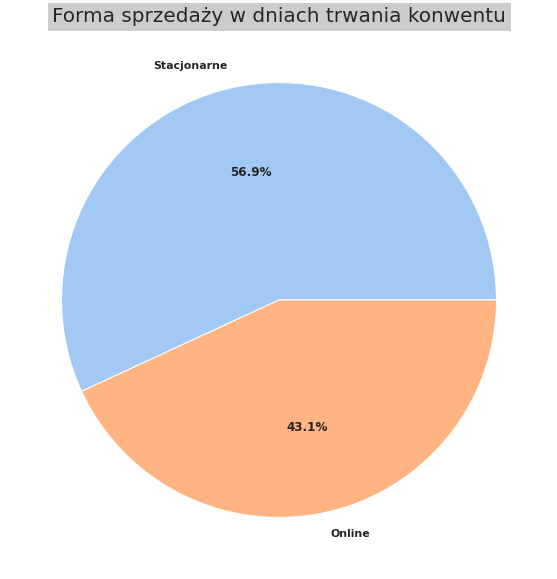

In [61]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))

ax.pie(df.loc[df["Data transakcji"] >= '2021-11-19', "Forma sprzedaży"].value_counts(), labels = df.loc[df["Data transakcji"] >= '2021-11-19', "Forma sprzedaży"].value_counts().index, colors = colors, autopct='%.1f%%')
ax.set_title("Forma sprzedaży w dniach trwania konwentu",bbox={'facecolor':'0.8', 'pad':5}, fontsize=20)

plt.show()

In [62]:
df.loc[df["Forma sprzedaży"] == "Stacjonarne"]

,Forma sprzedaży,Data transakcji,Netto,Płeć,Miasto
1472,Stacjonarne,2021-11-18,30.0,M,Radom
1575,Stacjonarne,2021-11-19,20.0,M,Miasto pniżej 50 tys.
1576,Stacjonarne,2021-11-19,20.0,K,Miasto powyzej 50 tys.
1584,Stacjonarne,2021-11-19,50.0,M,Poznań
1585,Stacjonarne,2021-11-19,50.0,M,Miasto powyzej 50 tys.
...,...,...,...,...,...
2401,Stacjonarne,2021-11-21,10.0,M,Białystok
2402,Stacjonarne,2021-11-21,10.0,K,Miasto powyzej 50 tys.
2403,Stacjonarne,2021-11-21,10.0,K,Gdynia
2404,Stacjonarne,2021-11-21,10.0,M,Miasto powyzej 50 tys.


## 1.3. Kiedy się sprzedawały bilety stacjonarne

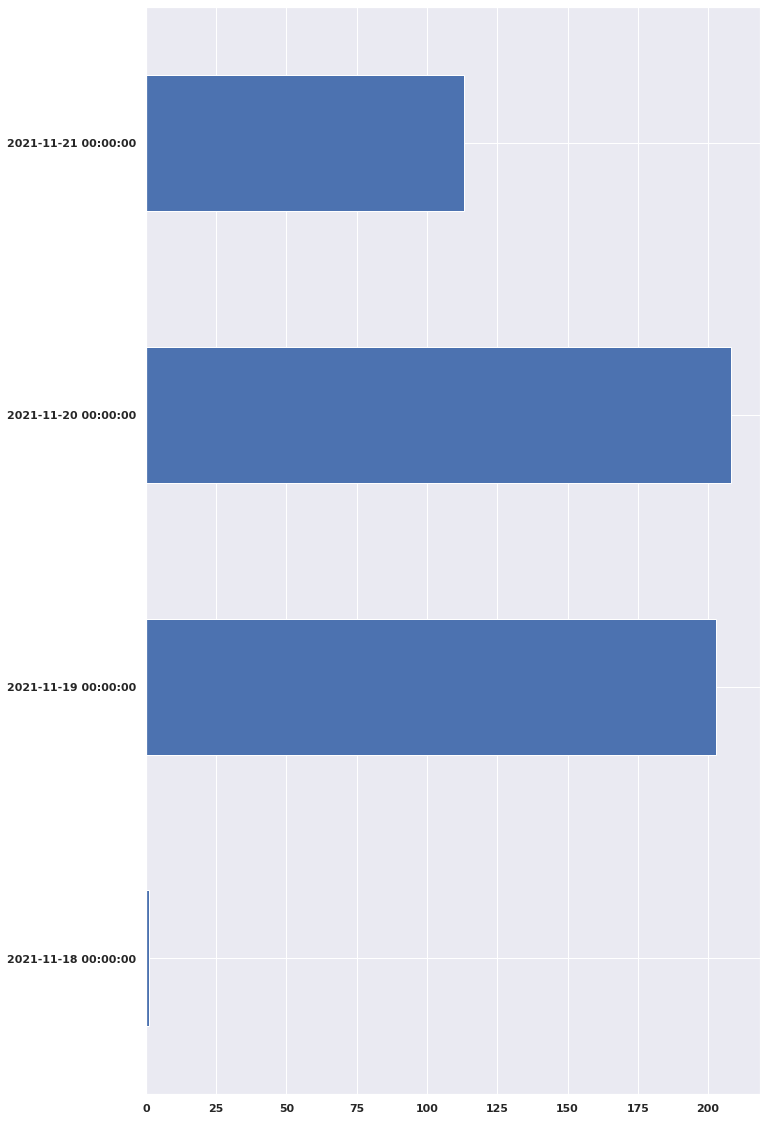

In [63]:
df.loc[df["Forma sprzedaży"] == 'Stacjonarne', "Data transakcji"].value_counts().sort_index().plot(kind='barh', figsize=(11, 20))

# 2. Badanie ilości transakcji w danych dniach

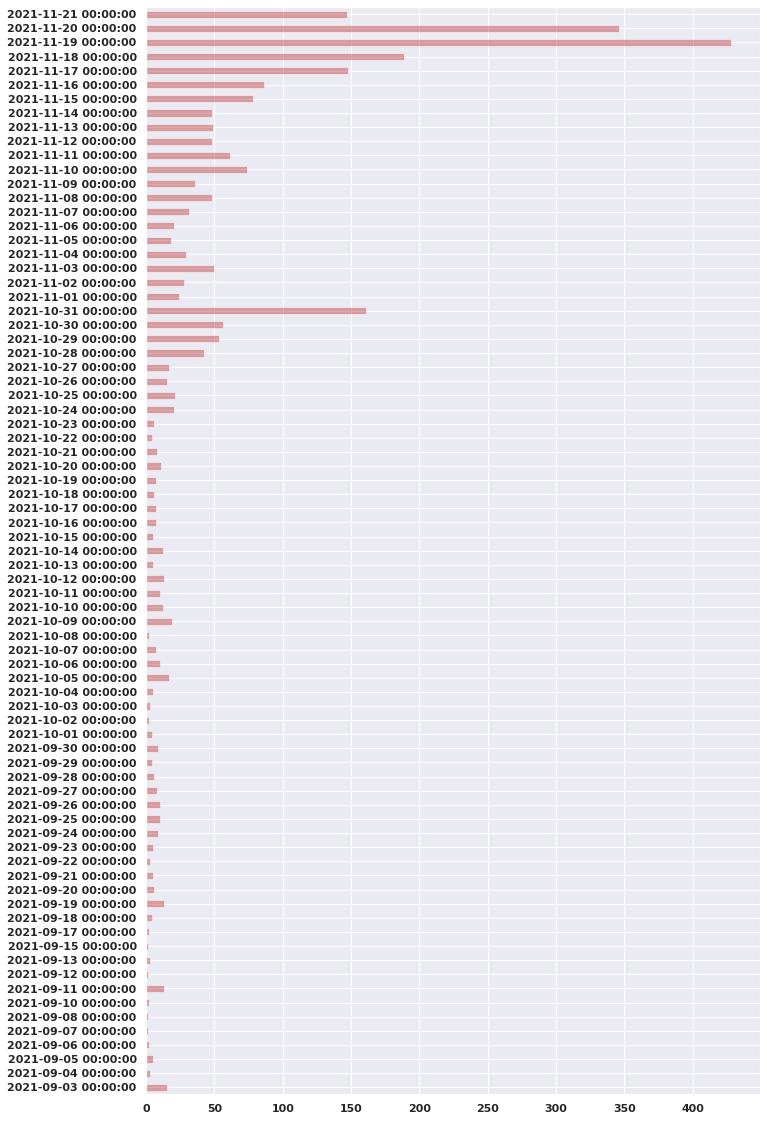

In [64]:
df['Data transakcji'].value_counts().sort_index().plot(kind='barh',color='r', alpha=0.5, figsize=(11, 20))

## 2.1. Badanie konkretnych przedziałów czasowych

In [48]:
df.loc[df["Data transakcji"] >= '2021-11-19'].count()

Forma sprzedaży    921
Data transakcji    921
Netto              921
Płeć               921
Miasto             921
dtype: int64

In [49]:
df.loc[df["Data transakcji"] >= '2021-10-24'].count()

Forma sprzedaży    2371
Data transakcji    2371
Netto              2371
Płeć               2371
Miasto             2371
dtype: int64

In [ ]:
df.loc[(df['Data transakcji'] >= '2021-10-28')& (df['Data transakcji'] <= '2021-10-31')].count()

Forma sprzedaży    312
Data transakcji    312
Netto              312
Płeć               312
Miasto             312
dtype: int64

In [ ]:
df.loc[df["Data transakcji"] <= '2021-10-3'].count()

Forma sprzedaży    150
Data transakcji    150
Netto              150
Płeć               150
Miasto             150
dtype: int64

# 3. Płeć i miasto zamieszkania a uczestnictwo w konwencie

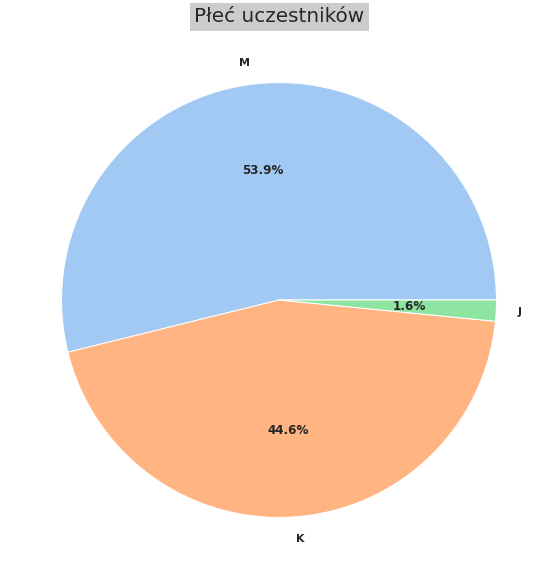

In [66]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))

ax.pie(df['Płeć'].value_counts(), labels = df['Płeć'].value_counts().index, colors = colors, autopct='%.1f%%')
ax.set_title("Płeć uczestników",bbox={'facecolor':'0.8', 'pad':5}, fontsize=20)

plt.show()

In [67]:
df.loc[df["Płeć"] == "K", "Miasto"].value_counts()

Miasto powyzej 50 tys.    448
Poznań                    187
Miasto pniżej 50 tys.     160
Warszawa                  104
Gdynia                     82
Kraków                     55
Radom                      48
Wrocław                    42
Białystok                  35
Chorzów                    27
Augustów                   13
Name: Miasto, dtype: int64

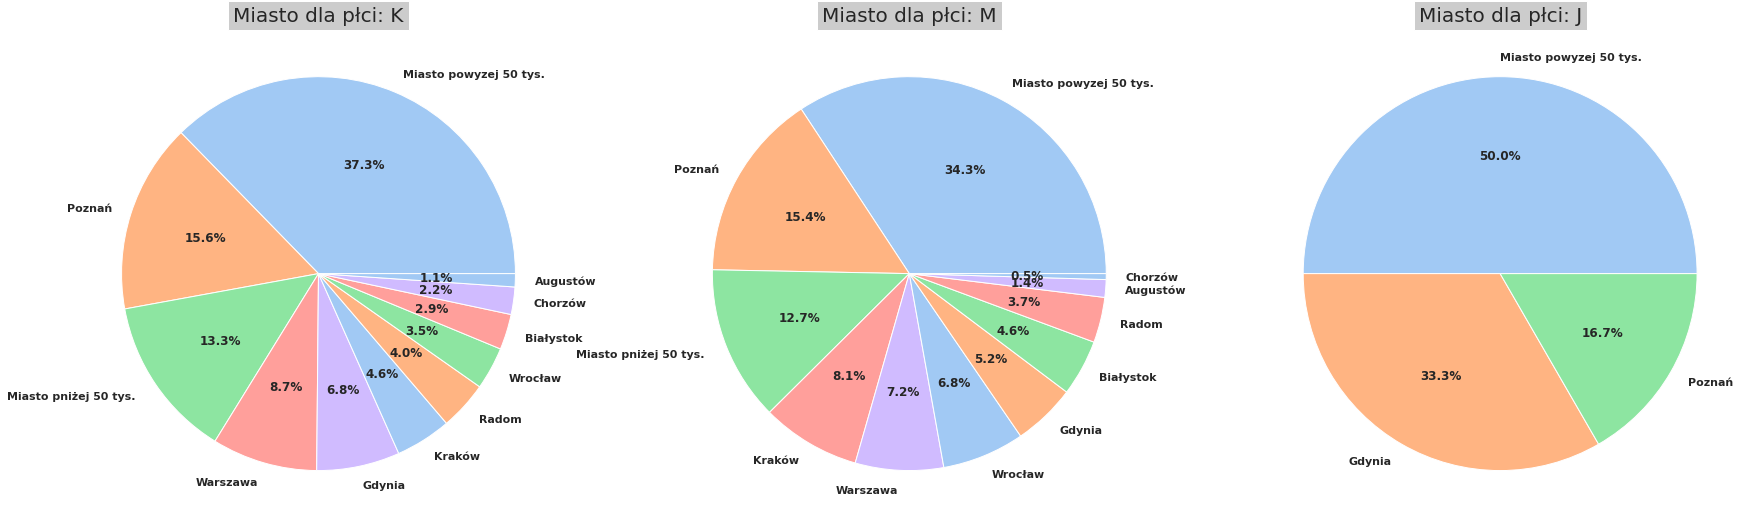

<Figure size 1440x1440 with 0 Axes>

In [68]:
fig, axs = plt.subplots(1, 3, figsize=(30, 30))
plt.figure(figsize=(20,20))

axs[0].pie(df.loc[df["Płeć"] == "K", "Miasto"].value_counts(), labels = df.loc[df["Płeć"] == "K", "Miasto"].value_counts().index, colors = colors, autopct='%.1f%%')
axs[0].set_title("Miasto dla płci: K",bbox={'facecolor':'0.8', 'pad':5}, fontsize=20)
axs[1].pie(df.loc[df["Płeć"] == "M", "Miasto"].value_counts(), labels = df.loc[df["Płeć"] == "M", "Miasto"].value_counts().index, colors = colors, autopct='%.1f%%')
axs[1].set_title("Miasto dla płci: M",bbox={'facecolor':'0.8', 'pad':5}, fontsize=20)
axs[2].pie(df.loc[df["Płeć"] == "J", "Miasto"].value_counts(), labels = df.loc[df["Płeć"] == "J", "Miasto"].value_counts().index, colors = colors, autopct='%.1f%%')
axs[2].set_title("Miasto dla płci: J",bbox={'facecolor':'0.8', 'pad':5}, fontsize=20)

plt.show()

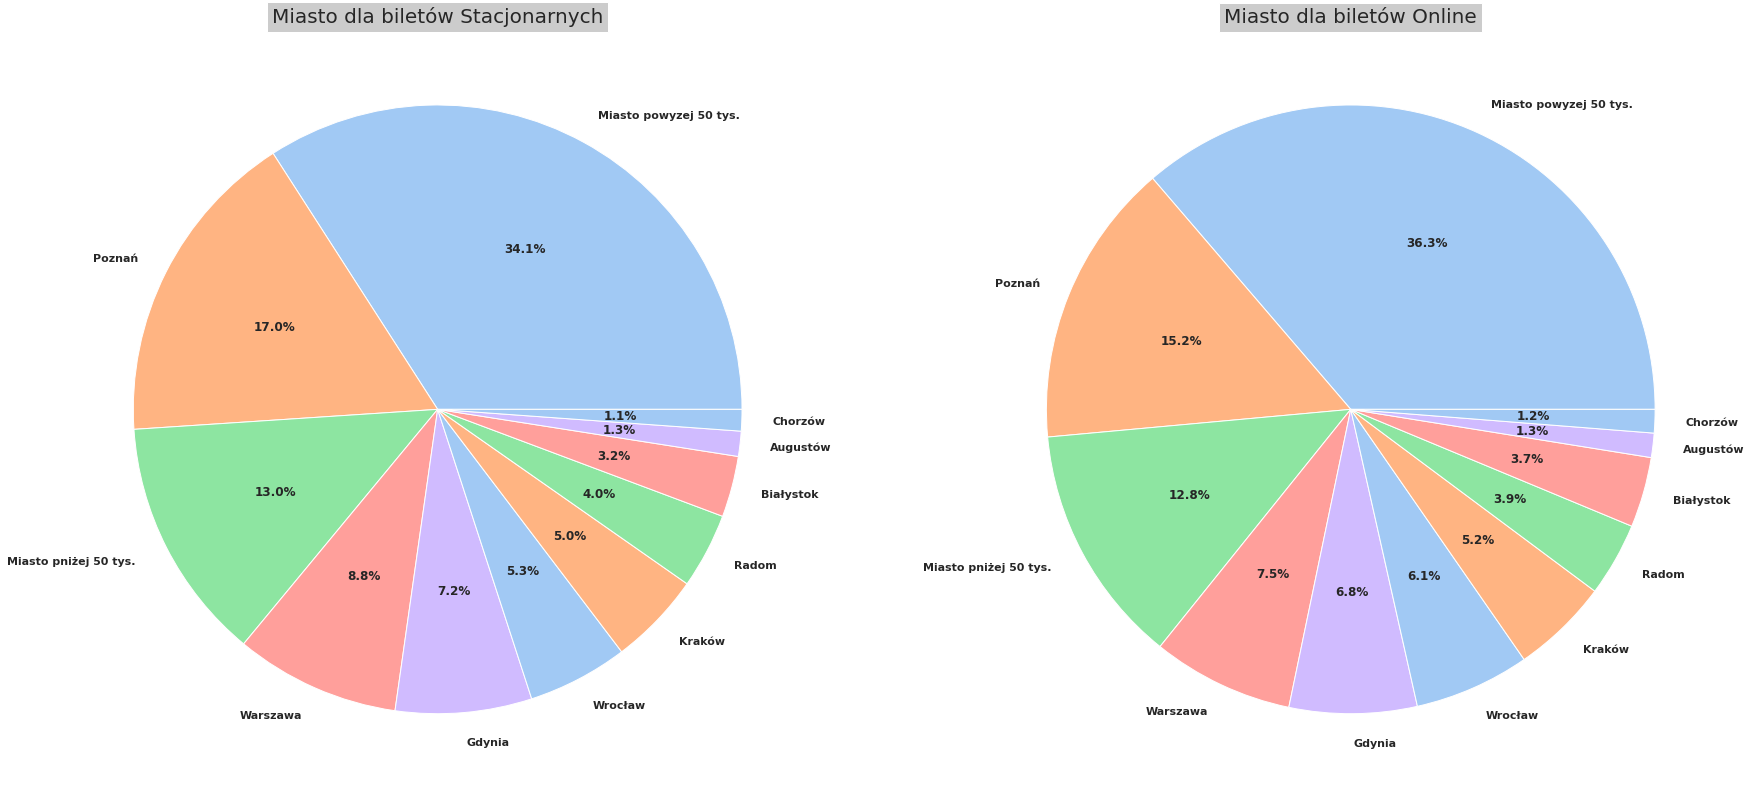

<Figure size 1440x1440 with 0 Axes>

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(30, 30))
plt.figure(figsize=(20,20))

axs[0].pie(df.loc[df["Forma sprzedaży"] == "Stacjonarne", "Miasto"].value_counts(), labels = df.loc[df["Forma sprzedaży"] == "Stacjonarne", "Miasto"].value_counts().index, colors = colors, autopct='%.1f%%')
axs[0].set_title("Miasto dla biletów Stacjonarnych",bbox={'facecolor':'0.8', 'pad':5}, fontsize=20)
axs[1].pie(df.loc[df["Forma sprzedaży"] == "Online", "Miasto"].value_counts(), labels = df.loc[df["Forma sprzedaży"] == "Stacjonarne", "Miasto"].value_counts().index, colors = colors, autopct='%.1f%%')
axs[1].set_title("Miasto dla biletów Online",bbox={'facecolor':'0.8', 'pad':5}, fontsize=20)

plt.show()

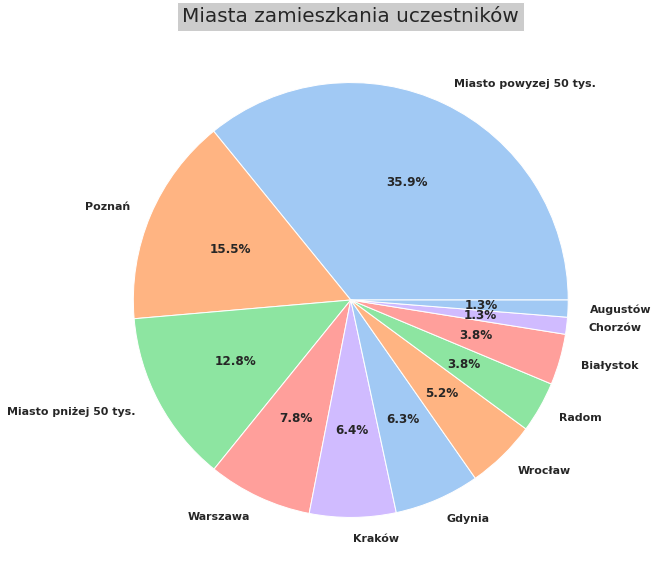

In [70]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))

ax.pie(df['Miasto'].value_counts(), labels = df['Miasto'].value_counts().index, colors = colors, autopct='%.1f%%')
ax.set_title("Miasta zamieszkania uczestników",bbox={'facecolor':'0.8', 'pad':5}, fontsize=20)

plt.show()

# 4. Badanie wartości netto sprzedanych biletów

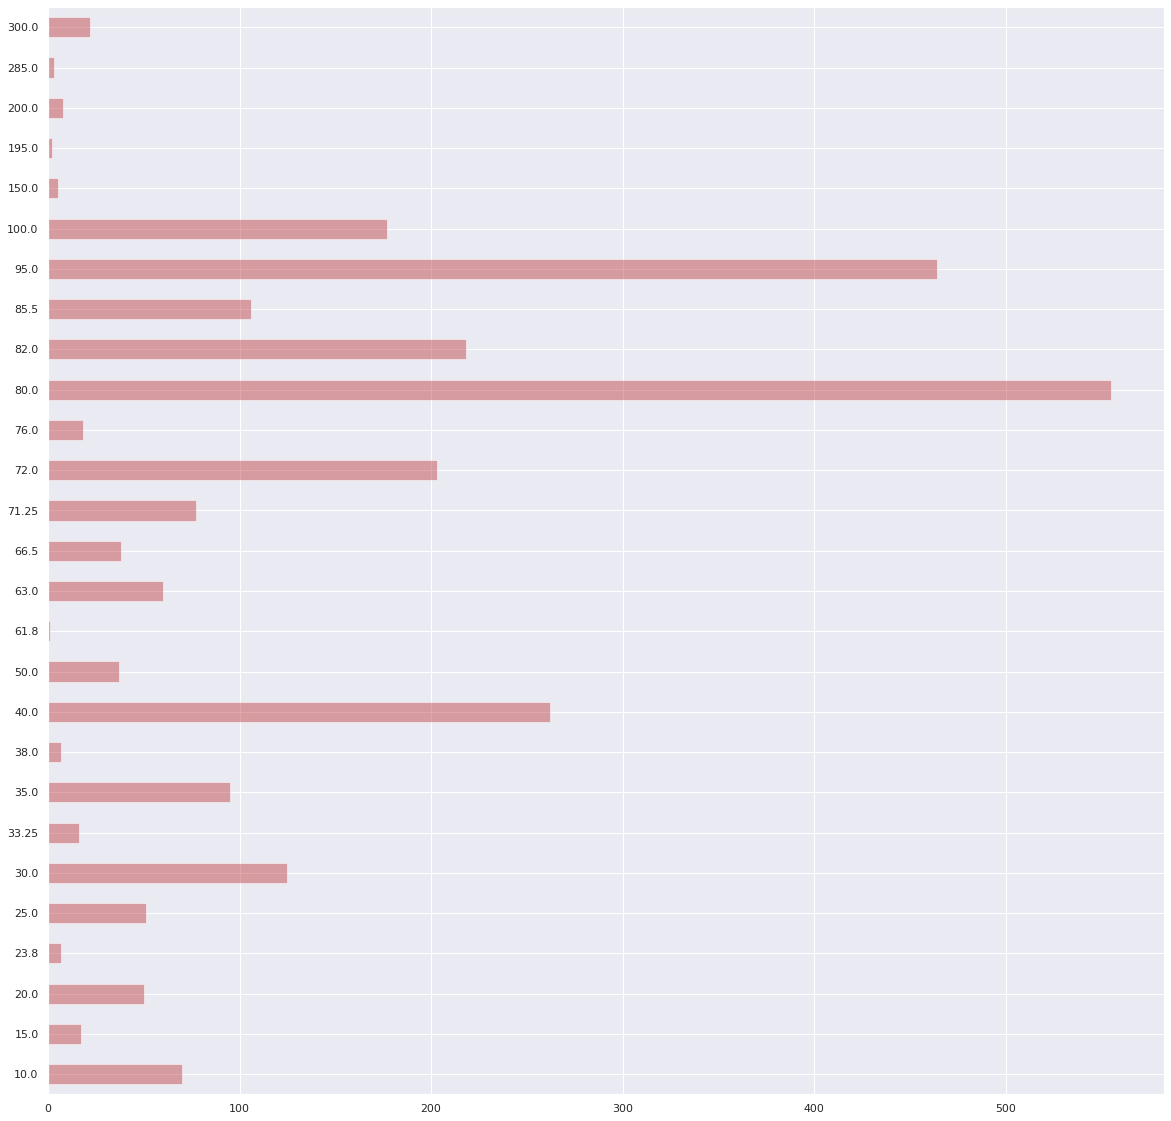

In [ ]:
plt.rcParams['font.size'] = 20.0
df['Netto'].value_counts().sort_index().plot.barh(color='r', alpha=0.5, figsize=(20, 20))

## 4.1. Zarboki w danych przedziałach

In [ ]:
df['Netto'].values.sum()

194752.65

In [ ]:
df.loc[df["Data transakcji"] >= '2021-11-19', 'Netto'].values.sum()

50893.0

In [ ]:
df.loc[df["Data transakcji"] >= '2021-10-24', 'Netto'].values.sum()

168708.35

In [ ]:
df.loc[df["Data transakcji"] <= '2021-10-02', 'Netto'].values.sum()

11001.8

In [ ]:
df.loc[(df['Data transakcji'] >= '2021-10-28')& (df['Data transakcji'] <= '2021-10-31'), 'Netto'].values.sum()

24636.25

## 4.2. Ile dany rodzaj biletu zarobił

In [ ]:
df.loc[df["Netto"] == 80.0, 'Netto'].values.sum()

44400.0

In [ ]:
df.loc[df["Netto"] == 100.0, 'Netto'].values.sum()

17700.0

In [ ]:
df.loc[df["Netto"] == 95.0, 'Netto'].values.sum()

44080.0

In [ ]:
df.loc[df["Netto"] == 82.0, 'Netto'].values.sum()

17876.0

In [ ]:
df.loc[df["Netto"] == 85.5, 'Netto'].values.sum()

9063.0

In [ ]:
df.loc[df["Netto"] == 40.0, 'Netto'].values.sum()

10480.0

In [ ]:
df.loc[df["Netto"] == 72.0, 'Netto'].values.sum()

14616.0

In [ ]:
df.loc[df["Netto"] == 300.0, 'Netto'].values.sum()

6600.0

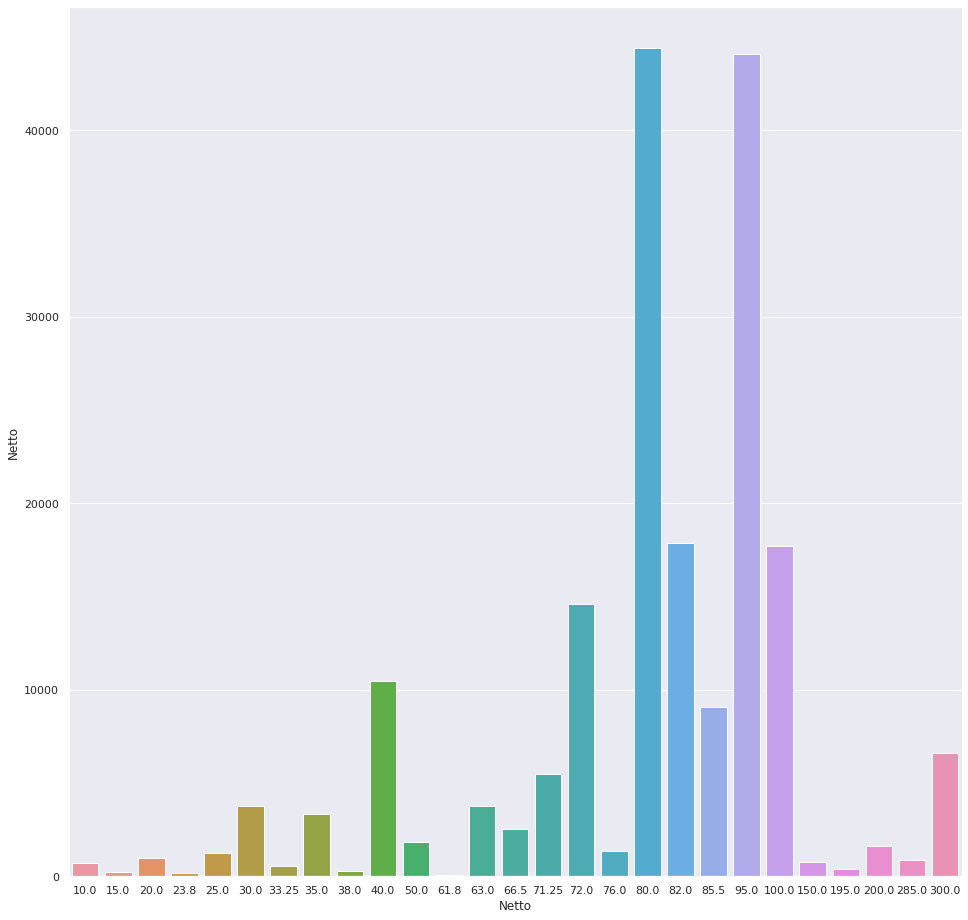

In [ ]:
fig, axs = plt.subplots(figsize=(16, 16))
ax = sns.barplot(x="Netto", y="Netto", data=df, estimator=sum)

# 5. Korelacje

In [ ]:
df_corr = df.copy()
df_corr

,Forma sprzedaży,Data transakcji,Netto,Płeć,Miasto
0,Online,2021-09-03,63.0,K,Warszawa
1,Online,2021-09-03,63.0,K,Warszawa
2,Online,2021-09-03,63.0,M,Warszawa
3,Online,2021-09-03,63.0,K,Wrocław
4,Online,2021-09-03,63.0,M,Poznań
...,...,...,...,...,...
2689,Online,2021-11-19,76.0,K,Miasto powyzej 50 tys.
2690,Online,2021-11-20,76.0,M,Kraków
2691,Online,2021-11-20,76.0,K,Miasto powyzej 50 tys.
2692,Online,2021-11-20,76.0,M,Poznań


In [ ]:
df_corr['Forma sprzedaży']=df_corr['Forma sprzedaży'].astype('category').cat.codes
df_corr['Data transakcji']=df_corr['Data transakcji'].astype('category').cat.codes
df_corr['Płeć']=df_corr['Płeć'].astype('category').cat.codes
df_corr['Miasto']=df_corr['Miasto'].astype('category').cat.codes
df_corr['Netto']=df_corr['Netto'].astype('category').cat.codes

In [ ]:
df_corr

,Forma sprzedaży,Data transakcji,Netto,Płeć,Miasto
0,0,0,12,1,9
1,0,0,12,1,9
2,0,0,12,2,9
3,0,0,12,1,10
4,0,0,12,2,7
...,...,...,...,...,...
2689,0,74,16,1,6
2690,0,75,16,2,4
2691,0,75,16,1,6
2692,0,75,16,2,7


                 Forma sprzedaży  Data transakcji     Netto      Płeć  \
Forma sprzedaży         1.000000         0.360655 -0.356743  0.009583   
Data transakcji         0.360655         1.000000 -0.200632  0.003372   
Netto                  -0.356743        -0.200632  1.000000  0.011546   
Płeć                    0.009583         0.003372  0.011546  1.000000   
Miasto                  0.019572        -0.028236  0.033923  0.022460   

                   Miasto  
Forma sprzedaży  0.019572  
Data transakcji -0.028236  
Netto            0.033923  
Płeć             0.022460  
Miasto           1.000000  


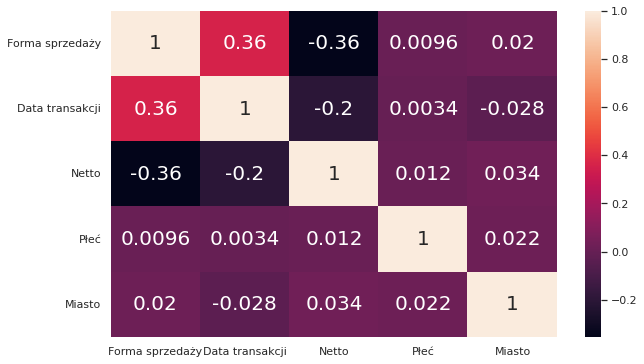

In [ ]:
print(df_corr.corr())

plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(),annot=True)
plt.show()